# Mini Project — Kaggle-Style ML Challenge 	
## Objective: 
    Apply advanced ML techniques to maximize model performance in a real-world dataset challenge. 
### Project Workflow: 
#### Dataset Understanding: 
    	Understand dataset fields, business problem, and target variable 
    	Identify missing values, categorical variables, and features needing engineering 
#### Feature Engineering: 
    	Create new features 
    	Encode categorical features 
    	Scale/normalize numerical features 
#### Model Building: 
    	Train multiple models: baseline + ensemble (Random Forest, XGBoost) 
    	Optimize hyperparameters if needed 
#### Model Evaluation: 
    	Apply cross-validation 
    	Compare models using metrics (F1, Accuracy, RMSE, R²) 
#### Visualization & Interpretation: 
    	Feature importance plots 
    	Predicted vs actual plots for regression 
    	Confusion matrix for classification 
#### Insights & Recommendations: 
    	Suggest actionable improvements based on model outputs 
    	Write a short report or markdown summary 

### Import Random packages

In [1]:
import numpy as np
import pandas as pd

### Load the file & view

In [2]:
df = pd.read_csv("House Price India.csv")
print(df.shape)
df.head()

(14619, 23)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### Let's see the summary of the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [5]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


### now checking for the missing value

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

### Feature Engineering

In [7]:
target = "Price"

X = df.drop(columns=[target])
y = df[target]

if "id" in X.columns:
    X = X.drop(columns=["id"])

X = X.copy()

current_year = X["Built Year"].max()

X["HouseAge"] = current_year - X["Built Year"]
X["Renovated"] = (X["Renovation Year"] != 0).astype(int)
X["TotalArea"] = X["living area"] + X["lot area"]
X["BasementRatio"] = X["Area of the basement"] / (X["living area"] + 1)
X["LivingRenovDiff"] = X["living_area_renov"] - X["living area"]

X.head()

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,HouseAge,Renovated,TotalArea,BasementRatio,LivingRenovDiff
0,42491,4,2.50,2920,4000,1.5,0,0,5,8,...,-114.470,2470,4000,2,51,106,0,6920,0.345772,-450
1,42491,5,2.75,2910,9480,1.5,0,0,3,8,...,-114.468,2940,6600,1,53,76,0,12390,0.000000,30
2,42491,4,2.50,3310,42998,2.0,0,0,3,9,...,-114.321,3350,42847,3,76,14,0,46308,0.000000,40
3,42491,3,2.00,2710,4500,1.5,0,0,4,8,...,-114.485,2060,4500,1,51,86,0,7210,0.306160,-650
4,42491,3,2.50,2600,4750,1.0,0,0,4,9,...,-114.590,2380,4750,1,67,64,0,7350,0.346021,-220


### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((11695, 26), (2924, 26))

### Columns Identification

In [9]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numerical:", len(num_cols))
print("Categorical:", len(cat_cols))

Numerical: 26
Categorical: 0


### Pipeline Preprocessing

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)
print("pipeline processed")

pipeline processed


### Model Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

baseline_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(exc...
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'HouseAge',
       'Renovated', 'TotalArea', 'BasementRatio', 'LivingRenovDiff'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LinearRegression())])

### Evaluation of baseline

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = baseline_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression")
print("RMSE:", rmse)
print("R2:", r2)

Baseline Linear Regression
RMSE: 207834.5268725339
R2: 0.7081328572023506


### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse = cross_val_score(
    baseline_model, X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=kf
)

cv_r2 = cross_val_score(
    baseline_model, X_train, y_train,
    scoring="r2",
    cv=kf
)

print("CV RMSE:", -cv_rmse.mean())
print("CV R2:", cv_r2.mean())

CV RMSE: 197067.4315377594
CV R2: 0.7038669541948496


### RandomForest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(exc...
       'Number of schools nearby', 'Distance from the airport', 'HouseAge',
       'Renovated', 'TotalArea', 'BasementRatio', 'LivingRenovDiff'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

### Evaluation(RandomForest)

In [20]:
y_pred_rf = rf_model.predict(X_test)

# rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForest")
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

RandomForest
RMSE: 207834.5268725339
R2: 0.880929712214641


### RandomForest Cross Validation

In [21]:
cv_rmse_rf = cross_val_score(
    rf_model, X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=kf
)

cv_r2_rf = cross_val_score(
    rf_model, X_train, y_train,
    scoring="r2",
    cv=kf
)

print("RF CV RMSE:", -cv_rmse_rf.mean())
print("RF CV R2:", cv_r2_rf.mean())

RF CV RMSE: 135337.6895299395
RF CV R2: 0.8599980926070533


### Hyperparameter Tuning

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best RMSE:", -search.best_score_)
print("Best Params:", search.best_params_)

Best RMSE: 150744.2381866778
Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 20}


### Ploting

### scatter plot

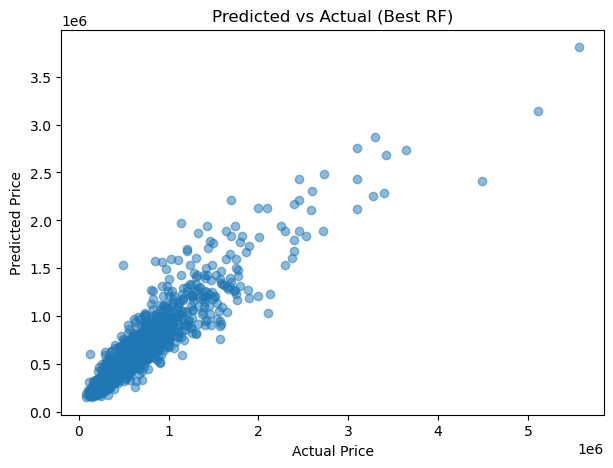

In [23]:
import matplotlib.pyplot as plt

best_rf = search.best_estimator_
y_pred_best = best_rf.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Best RF)")
plt.show()

### Residual Plot

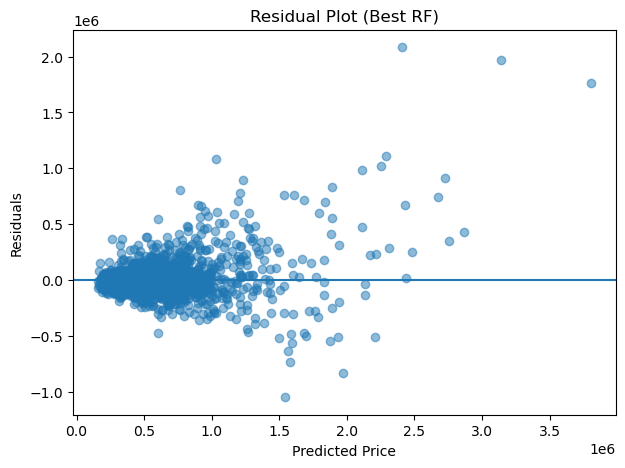

In [24]:
residuals = y_test - y_pred_best

plt.figure(figsize=(7,5))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Best RF)")
plt.show()

### Important Feature

In [25]:
feature_names_num = list(num_cols)

if len(cat_cols) > 0:
    encoder = best_rf.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
    feature_names_cat = list(encoder.get_feature_names_out(cat_cols))
else:
    feature_names_cat = []

all_features = feature_names_num + feature_names_cat
importances = best_rf.named_steps["model"].feature_importances_

fi = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi.head(15)

,Feature,Importance
3,living area,0.164322
9,grade of the house,0.158570
15,Lattitude,0.112261
17,living_area_renov,0.089132
10,Area of the house(excluding basement),0.081607
2,number of bathrooms,0.058452
25,LivingRenovDiff,0.043945
16,Longitude,0.036267
14,Postal Code,0.035962
7,number of views,0.032928


### Plot Top 10 Importances

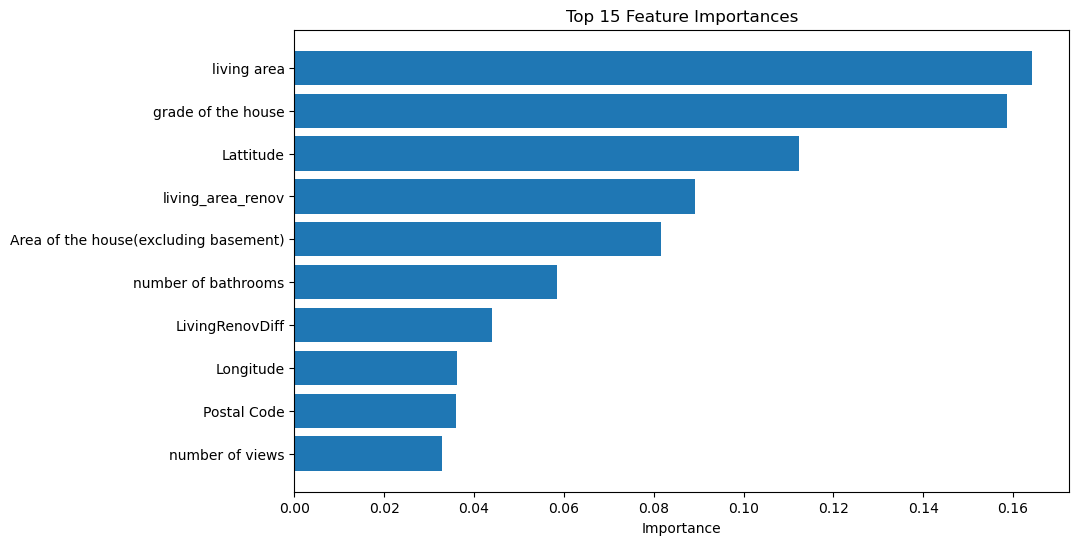

In [26]:
top = fi.head(10)

plt.figure(figsize=(10,6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.show()

### Plot Top 15 Importances

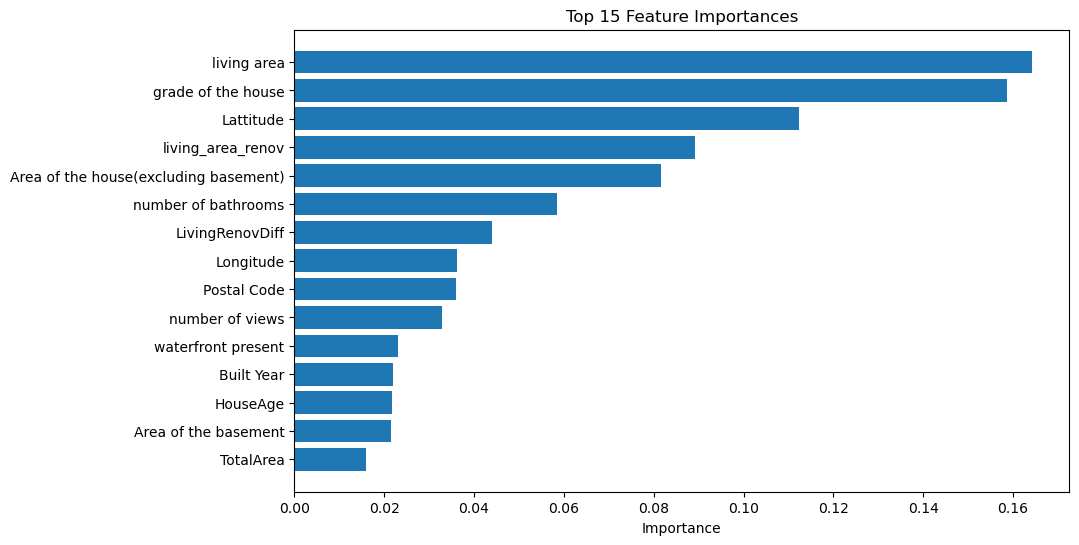

In [27]:
top = fi.head(15)

plt.figure(figsize=(10,6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.show()